In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


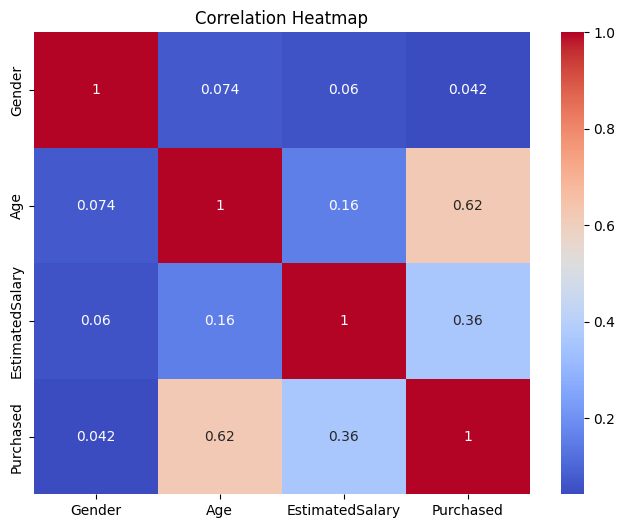

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: encode 'Gender' to numeric (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop 'User ID'
df = df.drop('User ID', axis=1)

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Features and Target
X = df[['Age', 'EstimatedSalary']]  # selecting important columns
y = df['Purchased']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[50  2]
 [ 7 21]]


In [14]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

True Positives: 21
False Positives: 2
True Negatives: 50
False Negatives: 7


In [15]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error Rate
error_rate = 1 - accuracy

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8875
Error Rate: 0.11250000000000004
Precision: 0.9130434782608695
Recall: 0.75


In [16]:
# Create a DataFrame to show Actual vs Predicted Purchased values
result = pd.DataFrame({'Actual Purchased': y_test, 'Predicted Purchased': y_pred})

print(result.head(10))  # showing first 10 rows

     Actual Purchased  Predicted Purchased
209                 0                    0
280                 1                    1
33                  0                    0
210                 1                    1
93                  0                    0
84                  0                    0
329                 1                    1
94                  0                    0
266                 0                    0
126                 0                    0
